# Market Basket Analysis: Apriori Algorithm 
Dataset: Order1.csv 
<h4>
The dataset has 38765 rows of the purchase orders of people from the 
grocery stores. These orders can be analysed, and association rules can 
be generated using Market Basket Analysis by algorithms like Apriori 
Algorithm. 
 
Follow following Steps: 
a. Data Pre-processing 
b. Generate the list of transactions from the dataset 
c. Train Apriori on the dataset 
d. Visualize the list of datasets </h4>

In [1]:
import pandas as pd 
from mlxtend.preprocessing import TransactionEncoder # for one-hot encoding
from mlxtend.frequent_patterns import apriori, association_rules # for apriori algorithm
import matplotlib.pyplot as plt 

In [2]:
# Load the dataset
df = pd.read_csv("/Users/namanlabhsetwar/Desktop/Sem 5 Practical/ML- Lab Assignments/LP-1 Dataset/Apriori/Order1.csv")
print(df.head(10))

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
5           4941  14-02-2015        rolls/buns
6           4501  08-05-2015  other vegetables
7           3803  23-12-2015        pot plants
8           2762  20-03-2015        whole milk
9           4119  12-02-2015    tropical fruit


In [3]:
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='Transaction')

In [4]:
transactions

,Member_number,Date,Transaction
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"
...,...,...,...
14958,4999,24-01-2015,"[tropical fruit, berries, other vegetables, yo..."
14959,4999,26-12-2015,"[bottled water, herbs]"
14960,5000,09-03-2014,"[fruit/vegetable juice, onions]"
14961,5000,10-02-2015,"[soda, root vegetables, semi-finished bread]"


In [5]:
te = TransactionEncoder()
te_ary = te.fit(transactions['Transaction']).transform(transactions['Transaction']) # one-hot encoding
df_encoded = pd.DataFrame(te_ary, columns=te.columns_) #columns_ returns the itemsets of the one-hot encoded data

In [6]:
df_encoded.head(10)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [10]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
# Generate frequent itemsets using Apriori

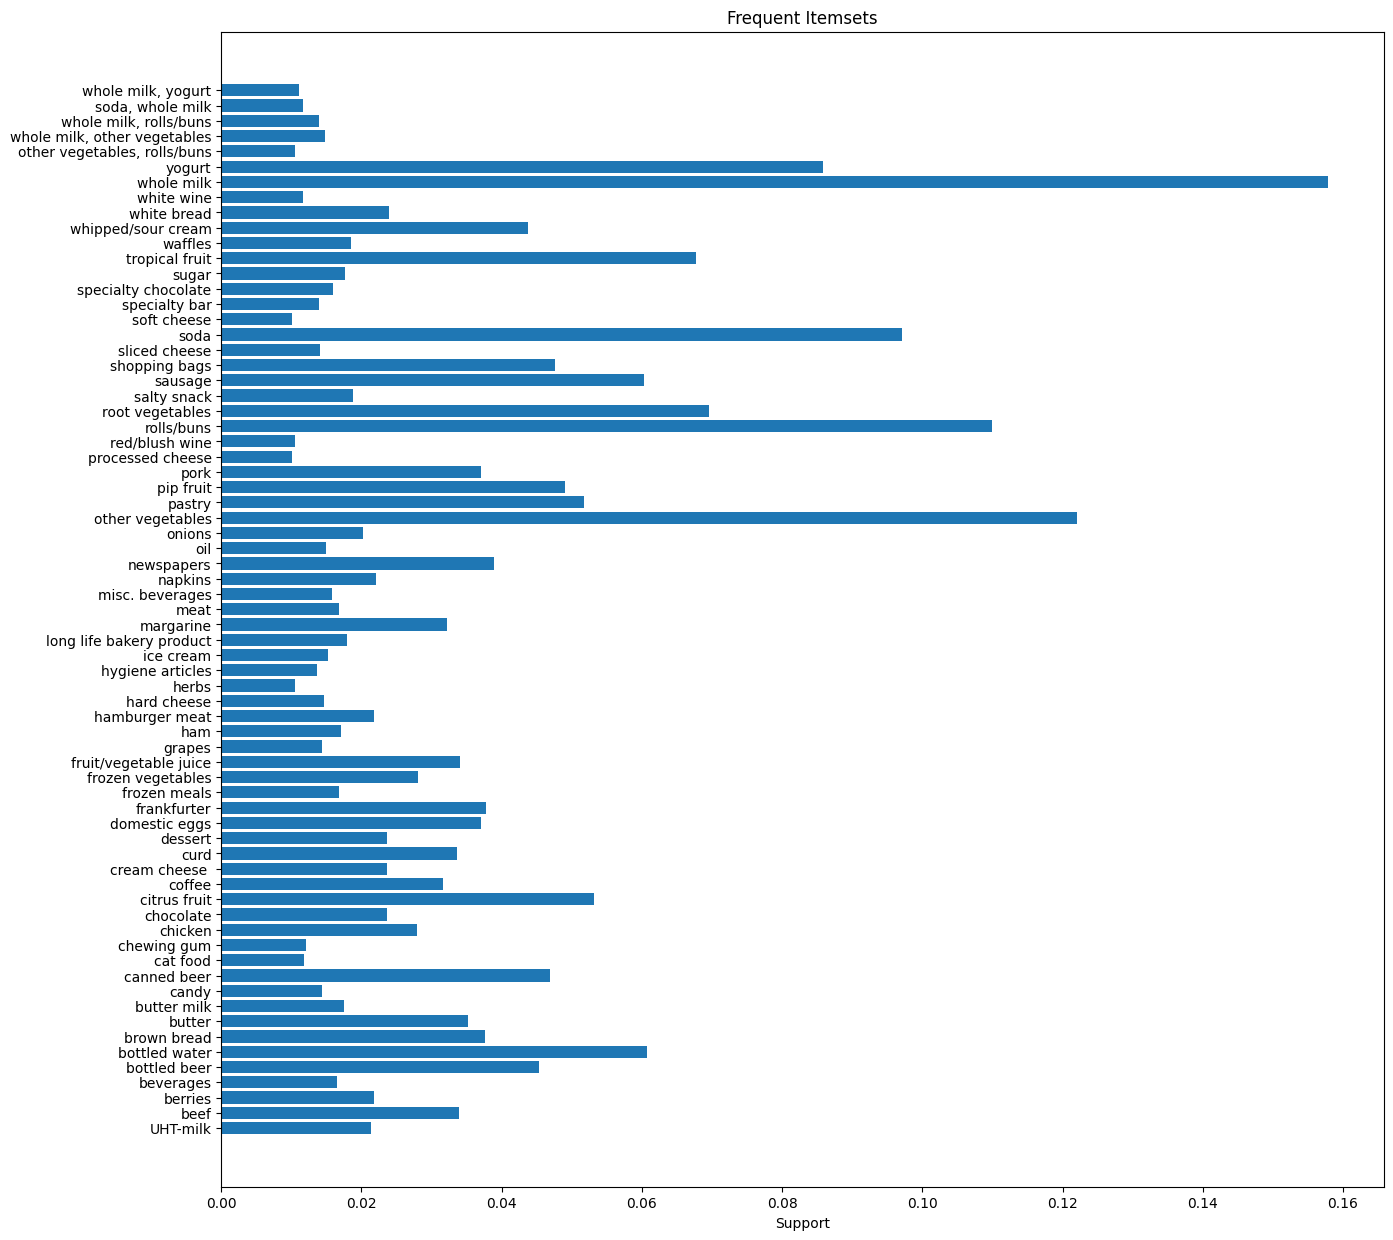

In [11]:
plt.figure(figsize=(15, 15))
plt.barh(range(len(frequent_itemsets)), frequent_itemsets['support'], align='center')
# support is the frequency of occurence of the itemset
plt.yticks(range(len(frequent_itemsets)), frequent_itemsets['itemsets'].apply(lambda x: ', '.join(x)))
plt.xlabel('Support')
plt.title('Frequent Itemsets')
plt.show()

In [14]:
# Display the frequent itemsets
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
#metric can be set to 'lift' or 'confidence' means the metric to be used for rule evaluation
print("**********Rules**********")
# Display the association rules
print(rules)
print("**********Rules**********")


     support                        itemsets
0   0.021386                      (UHT-milk)
1   0.033950                          (beef)
2   0.021787                       (berries)
3   0.016574                     (beverages)
4   0.045312                  (bottled beer)
..       ...                             ...
64  0.010559  (other vegetables, rolls/buns)
65  0.014837  (whole milk, other vegetables)
66  0.013968        (whole milk, rolls/buns)
67  0.011629              (soda, whole milk)
68  0.011161            (whole milk, yogurt)

[69 rows x 2 columns]
**********Rules**********
          antecedents         consequents  antecedent support  \
0  (other vegetables)        (rolls/buns)            0.122101   
1        (rolls/buns)  (other vegetables)            0.110005   
2        (whole milk)  (other vegetables)            0.157923   
3  (other vegetables)        (whole milk)            0.122101   
4        (whole milk)        (rolls/buns)            0.157923   
5        (rolls/buns)